# Project 1

In [1]:
import matplotlib
%matplotlib inline
import pandas as pd

# q1

In [2]:
from git import Repo
repo = Repo('.')
repo.git.checkout("master")

''

In [3]:
len(list(repo.iter_commits()))

8

# q2

In [4]:
author = [i.author.name for i in repo.iter_commits()]
author

['Steve', 'Steve', 'Ada', 'Steve', 'Ada', 'Linus', 'Linus', 'Ada']

In [5]:
auth = {}
for name in set(author):
    auth[name] = author.count(name)

In [6]:
auth

{'Steve': 3, 'Linus': 2, 'Ada': 3}

In [7]:
auth = {}
for name in author:
    if not name in auth:
        auth[name] = author.count(name)

In [8]:
auth

{'Steve': 3, 'Ada': 3, 'Linus': 2}

# q3

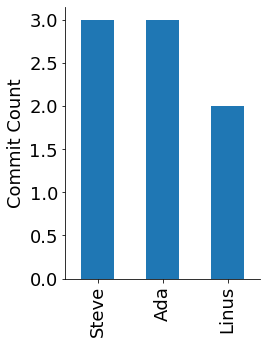

In [9]:
matplotlib.rcParams["font.size"] = 18
s = pd.Series(auth)
ax = s.plot.bar(figsize = (3.5,5))
ax.set_ylabel("Commit Count")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# q4

In [10]:
c = repo.iter_commits()

In [11]:
time = [i.authored_date for i in list(c)]
time

[1579554000,
 1579392000,
 1579201200,
 1579111200,
 1578952800,
 1578934836,
 1578686436,
 1578599600]

In [12]:
from datetime import datetime # yes, both the module and type are named datetime
dt = list(map(datetime.fromtimestamp,time))
for i in dt:
    print(i)

2020-01-20 21:00:00
2020-01-19 00:00:00
2020-01-16 19:00:00
2020-01-15 18:00:00
2020-01-13 22:00:00
2020-01-13 17:00:36
2020-01-10 20:00:36
2020-01-09 19:53:20


# q5

In [13]:
pwd

'/home/zyxu/p1/repo'

In [14]:
repo.git.checkout('master')

''

In [15]:
repo = Repo('.')
def get_lines(path):
    lines = 0
    with open(path, encoding="utf-8") as f:
        for line in f:
            lines += 1
    return lines

def  go_commit(commit):   ## go specific commit and count lines
    repo.git.checkout(commit)
    return get_lines('wc.py')

In [16]:
repo = Repo('.')
def get_lines(path):
    lines = 0
    f=open(path, encoding="utf-8")
    for line in f:
        lines += 1
    return lines

def  go_commit(commit):   ## go specific commit and count lines
    repo.git.checkout(commit)
    return get_lines('wc.py')

In [17]:
c = list(repo.iter_commits())
c

[<git.Commit "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4">,
 <git.Commit "f637df3f45bc389e1035cc3aadcf5d81a55f0dc4">,
 <git.Commit "c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5">,
 <git.Commit "f37e610ce055a3d894baac2d9449e6eb77c72320">,
 <git.Commit "6f5ca9327e986315ffcacddce5d9d6195c0913b7">,
 <git.Commit "761627a3ad9ee681f27211326e9149f01764ceee">,
 <git.Commit "b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9">,
 <git.Commit "6d7beafb8e79b7a92fed8e67673a33bb7f607dbe">]

In [18]:
lines = list(map(go_commit,c))
days = list(map(lambda x: (x - dt[-1]).total_seconds()/60/60/24,dt))

In [19]:
df = pd.DataFrame({'days':days[::-1], 'lines':lines[::-1]})
df

,days,lines
0,0.000000,21
1,1.005046,35
2,3.880046,35
3,4.087963,39
4,5.921296,40
5,6.962963,40
6,9.171296,40
7,11.046296,43


# q6

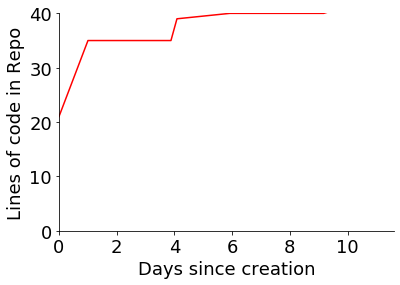

In [20]:
matplotlib.rcParams["font.size"] = 18
ax = df.plot.line(x = 'days', y = 'lines',color = 'red')
ax.set_ylabel("Lines of code in Repo")
ax.set_xlabel("Days since creation")
ax.set_ylim([0,40])
ax.set_xlim(0)
ax.get_legend().remove()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# q7 q8

In [21]:
import subprocess

In [22]:
def run_wc(body, commit = None):
    with open(file = 'test.txt', mode = "w", encoding = 'utf-8') as f:
        f.write(body)
    if commit == None:
        commit = 'master' 
    repo.git.checkout(commit)
    
    try:
        out = subprocess.check_output('python3 wc.py test.txt ALL',
                                  universal_newlines=True, shell = True)
        out = out.replace('\n','')
        out = eval(out)
    except:
        out = 'failed'
    # out = subprocess.check_output(['python3', 'wc.py', 'test.txt','ALL']).decode("utf-8") 
    return out

In [23]:
test1 = """X Y Z"""
run_wc(test1)

{'X': 1, 'Y': 1, 'Z': 1}

In [24]:
test2 = """A B
A C
"""
run_wc(test2)

{'A': 2, 'B': 1, 'C': 1}

In [25]:
test3 = """A B
a c
"""
run_wc(test2)

{'A': 2, 'B': 1, 'C': 1}

In [27]:
run_wc(test2,c[3])

{'A': 2, 'B': 1, 'C': 1}

# q9 q10 11

In [28]:
def test_table(body, expected):
    commit = [i.hexsha for i in c][::-1]
    msg20 = [i.message.replace('\n','')[:20] for i in c][::-1]
    author = [i.author.name for i in c][::-1]
    res = [run_wc(body, commit) for commit in c][::-1]
    tf = [i == expected for i in res]
    df = pd.DataFrame({'commit':commit, 'msg20':msg20, 'author':author,'pass':tf})
    return(df)

In [29]:
c

[<git.Commit "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4">,
 <git.Commit "f637df3f45bc389e1035cc3aadcf5d81a55f0dc4">,
 <git.Commit "c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5">,
 <git.Commit "f37e610ce055a3d894baac2d9449e6eb77c72320">,
 <git.Commit "6f5ca9327e986315ffcacddce5d9d6195c0913b7">,
 <git.Commit "761627a3ad9ee681f27211326e9149f01764ceee">,
 <git.Commit "b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9">,
 <git.Commit "6d7beafb8e79b7a92fed8e67673a33bb7f607dbe">]

In [30]:
test_table(test1, {'X': 1, 'Y': 1, 'Z': 1})

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,True
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


In [31]:
test_table(test2, {'A': 2, 'B': 1, 'C': 1})

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


In [32]:
test_table(test3, {'A': 2, 'B': 1, 'C': 1})

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,False
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


# q12 13

In [33]:
import numpy as np
import random
import string
import time

In [34]:
versions = {
    "v0-baseline": "6f5ca9327e986315ffcacddce5d9d6195c0913b7",
    "v1-open-once": "f37e610ce055a3d894baac2d9449e6eb77c72320",
    "v2-pass-per-uniq": "c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5",
    "v3-single-pass": "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4",
}

In [35]:
def gene_text(uniq_words, total_words, word_size=6):
    uniq = list(map(gene_word,np.repeat(word_size,uniq_words)))
    total = np.random.choice(uniq,size = total_words)
    total = ' '.join(total)
    return total

def gene_word(N):
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(N))

def time_run_sec(uniq_words, total_words, word_size=6, commit=None):
    total = gene_text(uniq_words, total_words, word_size)
    t0 = time.time()
    a = run_wc(total, commit = commit)
    t1 = time.time()
    us = (t1-t0) * 1e3
    # print("microseconds:", us)
    return(us)

In [36]:
t = []
for i in versions:
    t.append(time_run_sec(100,5000,commit = versions[i]))
s = pd.Series(t)
s.index = versions.keys()
s = s[::-1]
s

v3-single-pass        42.605639
v2-pass-per-uniq      61.875820
v1-open-once         949.550867
v0-baseline         6169.693470
dtype: float64

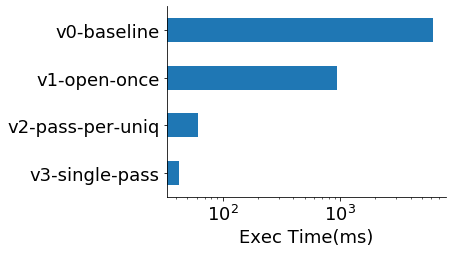

In [41]:
matplotlib.rcParams["font.size"] = 18
ax = s.plot.barh(figsize = (5,3.5))
ax.set_xlabel("Exec Time(ms)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xscale('log')

In [42]:
t = []
for i in versions:
    t.append(time_run_sec(1,5000,commit = versions[i]))
s = pd.Series(t)
s.index = versions.keys()
s = s[::-1]
s

v3-single-pass        52.978039
v2-pass-per-uniq      52.790880
v1-open-once        1706.654549
v0-baseline         6889.981985
dtype: float64

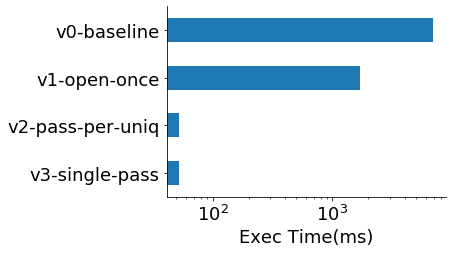

In [43]:
matplotlib.rcParams["font.size"] = 18
ax = s.plot.barh(figsize = (5,3.5))
ax.set_xlabel("Exec Time(ms)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xscale('log')

# q14

In [44]:
def get_df(commit = None):
    t = []
    for i in [1000,2000,5000,10000]:
        for j in [0.1,0.05,0.01]:
            t.append(time_run_sec(i*j,i,commit = commit))
    mt = np.array(t).reshape(4,3)/1000
    df = pd.DataFrame(mt,columns=[10,5,1],index=[1000,2000,5000,10000])
    df.index.name = 'total words'
    df.columns.name = 'percent uniq'
    return df

In [45]:
df2 = get_df(versions['v2-pass-per-uniq'])
df2

percent uniq,10,5,1
total words,,,
1000,0.051635,0.044997,0.043071
2000,0.060159,0.051948,0.045741
5000,0.142283,0.096612,0.061063
10000,0.414630,0.234298,0.091593


In [52]:
df2.transpose()

total words,1000,2000,5000,10000
percent uniq,,,,
10,0.051635,0.060159,0.142283,0.414630
5,0.044997,0.051948,0.096612,0.234298
1,0.043071,0.045741,0.061063,0.091593


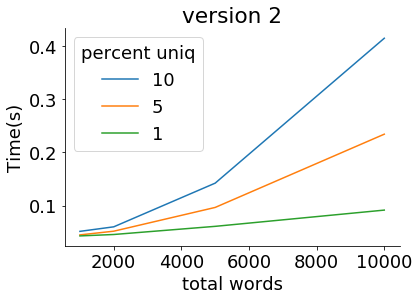

In [46]:
matplotlib.rcParams["font.size"] = 18
ax2 = df2.plot.line()
ax2.set_ylabel("Time(s)")
#ax.get_legend().remove()
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('version 2')
None

In [47]:
df3 = get_df(versions['v3-single-pass'])

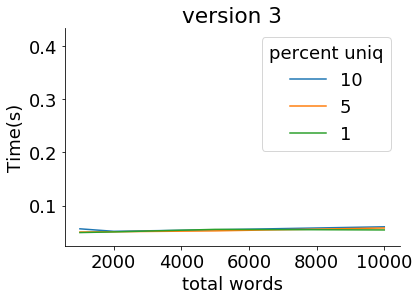

In [48]:
matplotlib.rcParams["font.size"] = 18
ax3 = df3.plot.line()
ax3.set_ylabel("Time(s)")
ax3.set_ylim(ax2.get_ylim())
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_title('version 3')
None

In [49]:
ax3

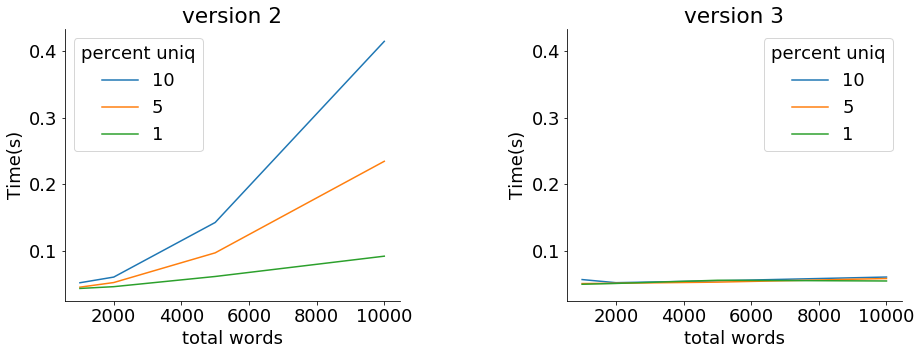

In [53]:
from matplotlib import pyplot as plt
t,ax_list = plt.subplots(ncols=2,figsize=(15,5))
ax2 = ax_list[0]
ax2.set_ylabel("Time(s)")
#ax.get_legend().remove()
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('version 2')
df2.plot.line(ax = ax2)


ax3 = ax_list[1]
ax3.set_ylabel("Time(s)")
ax3.set_ylim(ax2.get_ylim())
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_title('version 3')
df3.plot.line(ax = ax3)


plt.subplots_adjust(wspace=0.5)


# q15

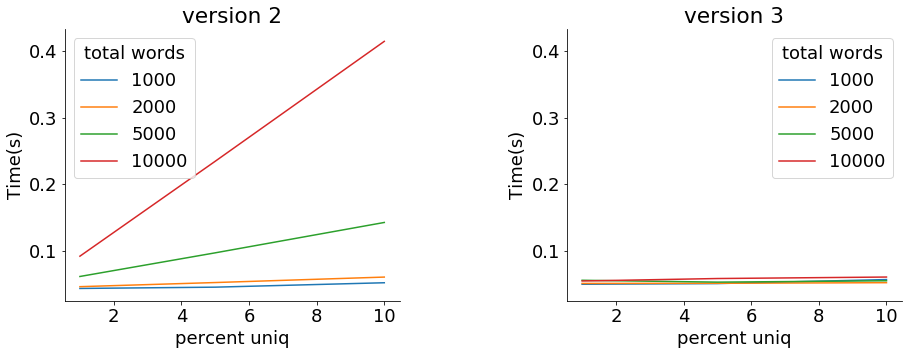

In [54]:
from matplotlib import pyplot as plt
t,ax_list = plt.subplots(ncols=2,figsize=(15,5))
ax2 = ax_list[0]
ax2.set_ylabel("Time(s)")
#ax.get_legend().remove()
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('version 2')
df2.transpose().plot.line(ax = ax2)


ax3 = ax_list[1]
ax3.set_ylabel("Time(s)")
ax3.set_ylim(ax2.get_ylim())
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_title('version 3')
df3.transpose().plot.line(ax = ax3)


plt.subplots_adjust(wspace=0.5)


# q16

In [55]:
df = pd.DataFrame()
df.index.name = "total"
df.columns.name = "trial"
for i in range(10):
    total_words = 10000 * (i+1)
    print(total_words)
    uniq = total_words // 10
    for trial in range(5):
        df.loc[total_words/1000, trial] = time_run_sec(uniq, total_words, word_size=6, commit=None)
df

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


trial,0,1,2,3,4
total,,,,,
10.0,62.976599,60.382605,66.056967,60.461760,63.044548
20.0,73.494196,72.160959,77.354193,71.144819,72.207689
30.0,85.134506,89.747667,83.729029,87.544441,87.914705
40.0,100.841284,101.111889,98.839760,96.553564,97.040415
50.0,111.211061,112.229109,110.453844,110.855818,113.327503
60.0,122.365713,121.476889,123.867273,124.572277,126.386404
70.0,134.324312,132.354259,132.654428,136.268616,139.095783
80.0,151.818514,155.555248,147.870541,144.403458,150.478363
90.0,164.833546,155.746698,155.656099,162.593603,159.572601


In [56]:
mean = df.mean(axis=1)
std = df.std(axis=1)

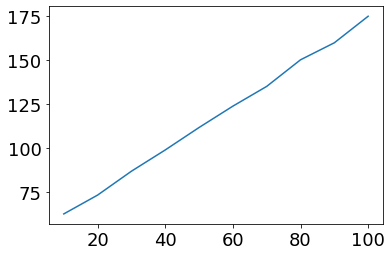

In [57]:
plt.plot(mean.index,mean)

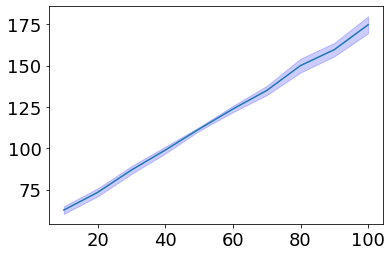

In [58]:
plt.plot(mean.index,mean)
plt.fill_between(mean.index, mean-std, mean+std, color='b', alpha=0.2)

# q17 Part 5

In [238]:
class Counter:
    def __init__(self):
        self.dic = {}
    
    def __str__(self):
        return "{}".format(self.dic)
    
    def __repr__(self):
        return "{}".format(self.dic)
        
    def __setitem__(self, word, number):
        if not isinstance(word, str):
            raise NotImplementedError("The word must be a string")
        word = word.upper()
        self.dic[word] = number
    
    def __getitem__(self, word):
        if not isinstance(word, str):
            raise NotImplementedError("The word must be a string")
        word = word.upper()
        if not word in self.dic:
            self.dic[word] = 0
        return self.dic[word]
    
    def max_keys(self):
        maxmum = max(list(self.dic.values()))
        maxitem = []
        for key in self.dic:
            maxitem.append(key) if self.dic[key] == maxmum else None
        return maxitem

In [239]:
c = Counter()

In [240]:
c = Counter()
c["apple"]

0

In [241]:
c = Counter()
c["apple"] += 1
c["banana"] += 1
c["BANANA"] += 1
c["kiwi"] += 2
c["banana"]

2

In [242]:
c

{'APPLE': 1, 'BANANA': 2, 'KIWI': 2}

In [243]:
c.max_keys()


['BANANA', 'KIWI']